In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [69]:
now = datetime.now()

ticker = 'AAPL' 
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-08,21.861464,22.346222,21.816370,22.219960,283192000
2016-01-11,22.215446,22.334945,21.947138,22.314653,198957600
2016-01-12,22.537872,22.702465,22.285347,22.670900,196616800
2016-01-13,21.958416,22.815198,21.938125,22.619040,249758400
2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400
...,...,...,...,...,...
2026-01-02,271.010010,277.839996,269.000000,272.260010,37838100
2026-01-05,267.260010,271.510010,266.140015,270.640015,45647200


# 2. Data Exploration And Visualization

In [9]:
type(df)

pandas.core.frame.DataFrame

In [74]:
df.shape

(2514, 9)

In [75]:
df.isna().sum()

Price   Ticker
Date                 0
Close   AAPL         0
High    AAPL         0
Low     AAPL         0
Open    AAPL         0
Volume  AAPL         0
MA_100              99
MA_200            2514
        AAPL       199
dtype: int64

In [77]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,114.677306,115.817017,113.428594,114.572671,1.014155e+08
std,73.506024,74.210958,72.740449,73.444388,5.759569e+07
min,20.604074,20.907410,20.405652,20.526529,1.791060e+07
25%,41.593865,41.930895,41.275349,41.578713,6.149265e+07
50%,120.883812,122.148485,119.216488,120.849464,8.863020e+07
75%,171.831394,173.243704,170.062863,171.539934,1.241381e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [78]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [79]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-08,21.861469,22.346228,21.816376,22.219966,283192000
2016-01-11,22.215450,22.334949,21.947142,22.314657,198957600
2016-01-12,22.537876,22.702469,22.285350,22.670904,196616800
2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400
2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400


In [70]:
df = df.reset_index()

In [4]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-08,21.861464,22.346222,21.816370,22.219960,283192000
1,2016-01-11,22.215460,22.334958,21.947151,22.314667,198957600
2,2016-01-12,22.537876,22.702469,22.285350,22.670904,196616800
3,2016-01-13,21.958414,22.815197,21.938123,22.619038,249758400
4,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400


In [82]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

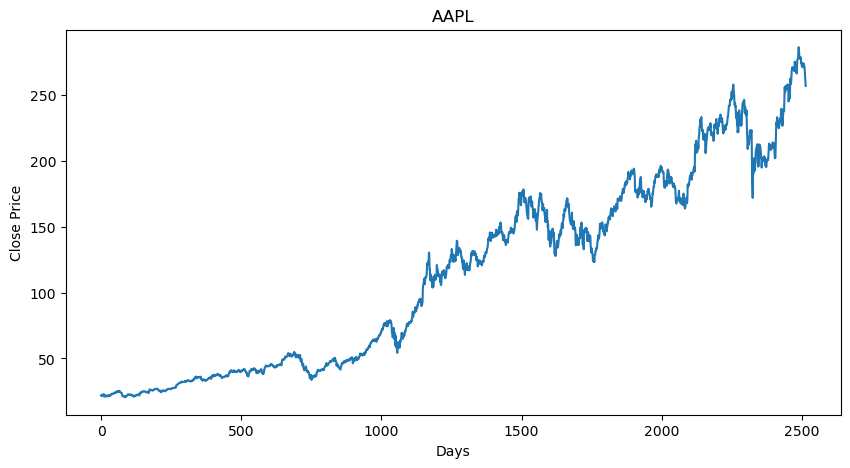

In [71]:
plt.figure(figsize=(10,5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');

# 3. Feature Engineering

In [73]:
df1 = pd.DataFrame([11,223,11,33,45,6677,89,90])
df1


,0
0,11
1,223
2,11
3,33
4,45
5,6677
6,89
7,90


In [74]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,11,NaN
1,223,NaN
2,11,NaN
3,33,NaN
4,45,64.6
5,6677,1397.8
6,89,1371.0
7,90,1386.8


### 100 days moving Average

In [75]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(105)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-08,21.861464,22.346222,21.816370,22.219960,283192000,NaN
1,2016-01-11,22.215446,22.334945,21.947138,22.314653,198957600,NaN
2,2016-01-12,22.537872,22.702465,22.285347,22.670900,196616800,NaN
3,2016-01-13,21.958416,22.815198,21.938125,22.619040,249758400,NaN
4,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN
...,...,...,...,...,...,...,...
100,2016-06-02,22.287260,22.314628,22.038660,22.259891,160766400,22.695629
101,2016-06-03,22.332870,22.412696,22.225676,22.303222,114019600,22.696803
102,2016-06-06,22.494797,23.238314,22.248480,22.348830,93170000,22.696372


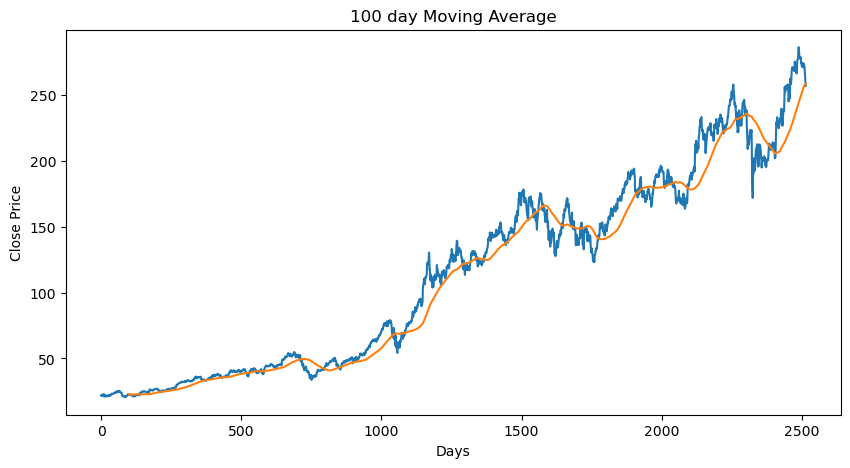

In [76]:
plt.figure(figsize=(10,5));
plt.plot(df.Close);
plt.title("100 day Moving Average");
plt.xlabel('Days');
plt.ylabel('Close Price');
plt.plot(df['MA_100']);

### 200 days Mooving Average

In [77]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(205)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-08,21.861464,22.346222,21.816370,22.219960,283192000,NaN,NaN
1,2016-01-11,22.215446,22.334945,21.947138,22.314653,198957600,NaN,NaN
2,2016-01-12,22.537872,22.702465,22.285347,22.670900,196616800,NaN,NaN
3,2016-01-13,21.958416,22.815198,21.938125,22.619040,249758400,NaN,NaN
4,2016-01-14,22.438667,22.655119,21.586395,22.086936,252680400,NaN,NaN
...,...,...,...,...,...,...,...,...
200,2016-10-24,26.978098,26.998735,26.829047,26.851978,94154800,24.161024,23.428326
201,2016-10-25,27.115685,27.140909,26.900134,27.046891,192516000,24.208852,23.452828
202,2016-10-26,26.505724,26.530948,25.982902,26.212210,264536800,24.248961,23.472667


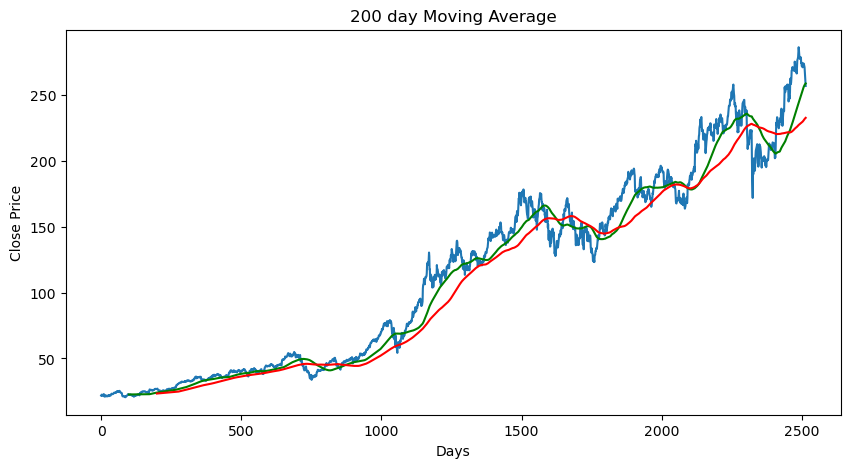

In [78]:
plt.figure(figsize=(10,5));
plt.plot(df.Close);
plt.plot(df['MA_100'], 'g');
plt.plot(df['MA_200'], 'r');
plt.title("200 day Moving Average");
plt.xlabel('Days');
plt.ylabel('Close Price');


### Calculate % Percentage change in each trading Session

In [79]:
df['Percentage_Changed'] = df.Close.pct_change()
df[['Close','Percentage_Changed']]

Price,Close,Percentage_Changed
Ticker,AAPL,
0,21.861464,NaN
1,22.215446,0.016192
2,22.537872,0.014514
3,21.958416,-0.025710
4,22.438667,0.021871
...,...,...
2510,271.010010,-0.003127
2511,267.260010,-0.013837
2512,262.359985,-0.018334


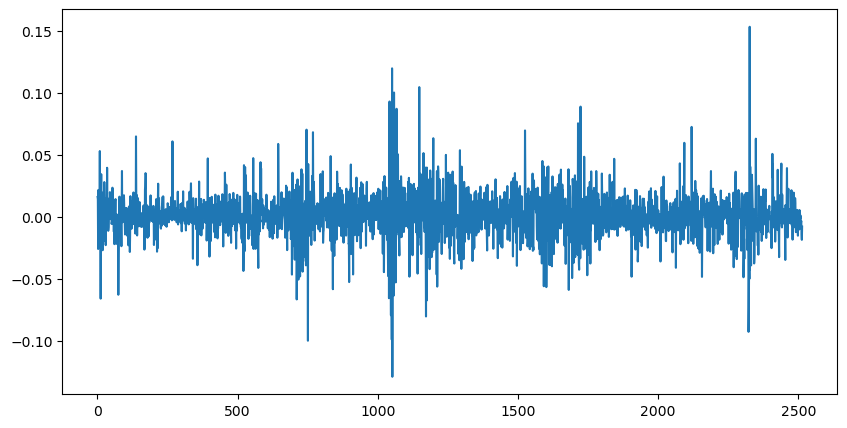

In [110]:
plt.figure(figsize=(10,5));
plt.plot(df.Percentage_Changed);

# 4. Data Preprocessing

In [ ]:
# !pip install scikit-learn keras

In [113]:
df.shape

(2514, 9)

In [80]:
# Spliting data into training and testing 
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        21.861464
1        22.215446
2        22.537872
3        21.958416
4        22.438667
...            ...
1755    124.166786
1756    127.683731
1757    127.998962
1758    123.211212
1759    124.482040

[1760 rows x 1 columns]
Ticker        AAPL
1760    123.161949
1761    127.693573
1762    128.215698
1763    128.787079
1764    131.506058
...            ...
2510    271.010010
2511    267.260010
2512    262.359985
2513    260.329987
2514    256.788605

[755 rows x 1 columns]


In [ ]:
# Scaling Down Data into 0 and 1 

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00797498],
       [0.01022012],
       [0.01226511],
       ...,
       [0.68115337],
       [0.650787  ],
       [0.65884725]], shape=(1760, 1))

In [11]:
data_training_array.shape

(1759, 1)

# 5. Sequence Creation

In [83]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
x_train

array([[[0.00797498],
        [0.01022012],
        [0.01226511],
        ...,
        [0.01447999],
        [0.01377119],
        [0.01174604]],

       [[0.01022012],
        [0.01226511],
        [0.0085899 ],
        ...,
        [0.01377119],
        [0.01174604],
        [0.0106756 ]],

       [[0.01226511],
        [0.0085899 ],
        [0.0116359 ],
        ...,
        [0.01174604],
        [0.0106756 ],
        [0.01096489]],

       ...,

       [[0.89807307],
        [0.92502091],
        [0.92034251],
        ...,
        [0.68177827],
        [0.65684774],
        [0.67915401]],

       [[0.92502091],
        [0.92034251],
        [0.94286145],
        ...,
        [0.65684774],
        [0.67915401],
        [0.68115337]],

       [[0.92034251],
        [0.94286145],
        [0.94966057],
        ...,
        [0.67915401],
        [0.68115337],
        [0.650787  ]]], shape=(1660, 100, 1))

In [14]:
x_train.ndim

3

In [15]:
y_train.ndim

1

# 6. Model Building 

In [ ]:
# !pip install tensorflow

In [85]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [86]:
# ML model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [87]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Train Model

In [88]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - loss: 0.0109
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 7.2955e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 6.9730e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 6.4880e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 6.3523e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 6.0691e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.4123e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 5.4360e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 5.3784e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 7.3604e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 6.2157e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 5.3361e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 4.7749e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 4.2902e-04
E

In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [90]:
# Save the training Model
model.save('Stock_prediction_model.keras')

# 8. Preparing Test Data

In [91]:
data_training.tail(100)

Ticker,AAPL
1660,169.261490
1661,170.333481
1662,170.176102
1663,171.671051
1664,171.277664
...,...
1755,124.166786
1756,127.683731
1757,127.998962
1758,123.211212


In [35]:
data_testing

Ticker,AAPL
1760,123.161949
1761,127.693558
1762,128.215714
1763,128.787109
1764,131.506088
...,...
2510,271.010010
2511,267.260010
2512,262.359985
2513,260.329987


In [92]:
past_100_days = data_training.tail(100)

In [93]:
past_100_days

Ticker,AAPL
1660,169.261490
1661,170.333481
1662,170.176102
1663,171.671051
1664,171.277664
...,...
1755,124.166786
1756,127.683731
1757,127.998962
1758,123.211212


In [15]:
final_df =  pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,169.261490
1,170.333481
2,170.176117
3,171.671051
4,171.277649
...,...
850,271.010010
851,267.260010
852,262.359985
853,260.329987


In [94]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.82770602e-01],
       [2.89346102e-01],
       [2.88380845e-01],
       [2.97550642e-01],
       [2.95137547e-01],
       [2.79271512e-01],
       [2.55442040e-01],
       [2.53390881e-01],
       [2.55200562e-01],
       [2.70282730e-01],
       [2.31612755e-01],
       [2.18099538e-01],
       [2.03198478e-01],
       [1.93003336e-01],
       [1.97467496e-01],
       [1.84497042e-01],
       [1.76775084e-01],
       [1.85402117e-01],
       [1.76352965e-01],
       [1.93908223e-01],
       [2.30466390e-01],
       [1.72612585e-01],
       [1.81480815e-01],
       [1.63744261e-01],
       [1.53669671e-01],
       [1.76473236e-01],
       [1.91072730e-01],
       [1.71888619e-01],
       [1.65976622e-01],
       [1.52040818e-01],
       [1.54092164e-01],
       [1.60064344e-01],
       [1.48481359e-01],
       [1.04080495e-01],
       [7.82604211e-02],
       [1.03899574e-01],
       [1.25919178e-01],
       [1.27728858e-01],
       [1.21877231e-01],
       [8.96622973e-02],


In [95]:
input_data.shape

(855, 1)

In [96]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100  : i])
    y_test.append(input_data[i, 0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [98]:
x_test

array([[[2.82770602e-01],
        [2.89346102e-01],
        [2.88380845e-01],
        ...,
        [2.96698683e-02],
        [3.02081395e-04],
        [8.09732571e-03]],

       [[2.89346102e-01],
        [2.88380845e-01],
        [2.97550642e-01],
        ...,
        [3.02081395e-04],
        [8.09732571e-03],
        [0.00000000e+00]],

       [[2.88380845e-01],
        [2.97550642e-01],
        [2.95137547e-01],
        ...,
        [8.09732571e-03],
        [0.00000000e+00],
        [2.77964957e-02]],

       ...,

       [[6.74375257e-01],
        [6.71004861e-01],
        [6.63712509e-01],
        ...,
        [9.12100913e-01],
        [9.06887236e-01],
        [8.83885060e-01]],

       [[6.71004861e-01],
        [6.63712509e-01],
        [6.59423000e-01],
        ...,
        [9.06887236e-01],
        [8.83885060e-01],
        [8.53828733e-01]],

       [[6.63712509e-01],
        [6.59423000e-01],
        [6.57400763e-01],
        ...,
        [8.83885060e-01],
        [8.5382

# 9. Making Prediction

In [99]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


In [100]:
y_predicted

array([[0.01639189],
       [0.01125772],
       [0.01377189],
       [0.01935425],
       [0.02540229],
       [0.03417686],
       [0.04158167],
       [0.04858804],
       [0.05545873],
       [0.05927716],
       [0.06111111],
       [0.06596136],
       [0.07585341],
       [0.08715951],
       [0.09462799],
       [0.10231018],
       [0.11129442],
       [0.11291175],
       [0.11403774],
       [0.11669848],
       [0.12871794],
       [0.14703272],
       [0.15650205],
       [0.16589192],
       [0.16690066],
       [0.16316597],
       [0.15997405],
       [0.16336285],
       [0.16644248],
       [0.17267437],
       [0.17474464],
       [0.17276913],
       [0.16257982],
       [0.15421696],
       [0.14989614],
       [0.1432564 ],
       [0.14024708],
       [0.13834016],
       [0.13361254],
       [0.13053691],
       [0.13802543],
       [0.15175751],
       [0.15898854],
       [0.164319  ],
       [0.16291101],
       [0.15601338],
       [0.15334839],
       [0.156

In [101]:
y_test

array([0.        , 0.0277965 , 0.03099935, 0.03450425, 0.05118223,
       0.0506988 , 0.05885627, 0.06598679, 0.0615757 , 0.06193839,
       0.07764924, 0.09722795, 0.10580856, 0.10175978, 0.11444954,
       0.12635384, 0.10864873, 0.11644379, 0.12333265, 0.15590306,
       0.17814037, 0.16140183, 0.17904647, 0.16255007, 0.156205  ,
       0.1584442 , 0.17563181, 0.17169815, 0.18458895, 0.17478458,
       0.16776431, 0.14313272, 0.14573516, 0.14870065, 0.13242092,
       0.1397437 , 0.13665746, 0.12394814, 0.1275792 , 0.1585655 ,
       0.17551098, 0.16201507, 0.169701  , 0.15590259, 0.14325383,
       0.15517629, 0.16800644, 0.1704273 , 0.18773594, 0.1825918 ,
       0.19711651, 0.20849415, 0.19971886, 0.20637607, 0.21436468,
       0.20244232, 0.19862958, 0.21751157, 0.22713418, 0.2425064 ,
       0.25019223, 0.24692433, 0.23560706, 0.24105379, 0.22513722,
       0.21769324, 0.2134568 , 0.24650062, 0.24438254, 0.24450356,
       0.25200772, 0.25902827, 0.25309727, 0.24323271, 0.24510

In [102]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [103]:
y_predicted

array([125.83429, 124.99728, 125.40715, 126.31724, 127.30323, 128.73373,
       129.94093, 131.08316, 132.20328, 132.82579, 133.12477, 133.9155 ,
       135.52818, 137.37138, 138.58897, 139.84137, 141.30606, 141.56973,
       141.7533 , 142.18707, 144.14658, 147.1324 , 148.67618, 150.20699,
       150.37144, 149.76257, 149.24222, 149.79468, 150.29674, 151.31271,
       151.65022, 151.32816, 149.66702, 148.30365, 147.59923, 146.51675,
       146.02615, 145.71527, 144.94455, 144.44313, 145.66397, 147.90268,
       149.08154, 149.95056, 149.72102, 148.59651, 148.16203, 148.70644,
       149.50539, 151.03477, 152.02995, 153.31795, 154.87358, 155.50688,
       156.02603, 156.76389, 156.65541, 156.15347, 156.74503, 157.97818,
       159.85512, 161.71626, 162.73035, 162.48773, 162.30023, 161.2691 ,
       159.98058, 158.85406, 160.0171 , 161.30896, 162.22469, 163.14972,
       164.14238, 164.43231, 163.84363, 163.33615, 162.47963, 161.84644,
       163.1198 , 164.92299, 166.21451, 166.51851, 

In [104]:
y_test

array([123.16194916, 127.69355774, 128.2157135 , 128.78710938,
       131.50608826, 131.42727661, 132.75717163, 133.91964722,
       133.20051575, 133.25964355, 135.82095337, 139.01283264,
       140.41171265, 139.75164795, 141.82043457, 143.76116943,
       140.8747406 , 142.14555359, 143.26863098, 148.57852173,
       152.2038269 , 149.47497559, 152.35154724, 149.66217041,
       148.62774658, 148.99279785, 151.79486084, 151.15356445,
       153.25512695, 151.65673828, 150.51223755, 146.49659729,
       146.92086792, 147.40432739, 144.75027466, 145.9440918 ,
       145.44094849, 143.36897278, 143.9609375 , 149.01257324,
       151.77516174, 149.57495117, 150.82797241, 148.57844543,
       146.51634216, 148.46003723, 150.55171204, 150.94638062,
       153.76817322, 152.92953491, 155.29747009, 157.15234375,
       155.72172546, 156.80703735, 158.10940552, 156.16572571,
       155.54414368, 158.62243652, 160.19119263, 162.69729614,
       163.95030212, 163.4175415 , 161.57250977, 162.46

Text(0, 0.5, 'Price')

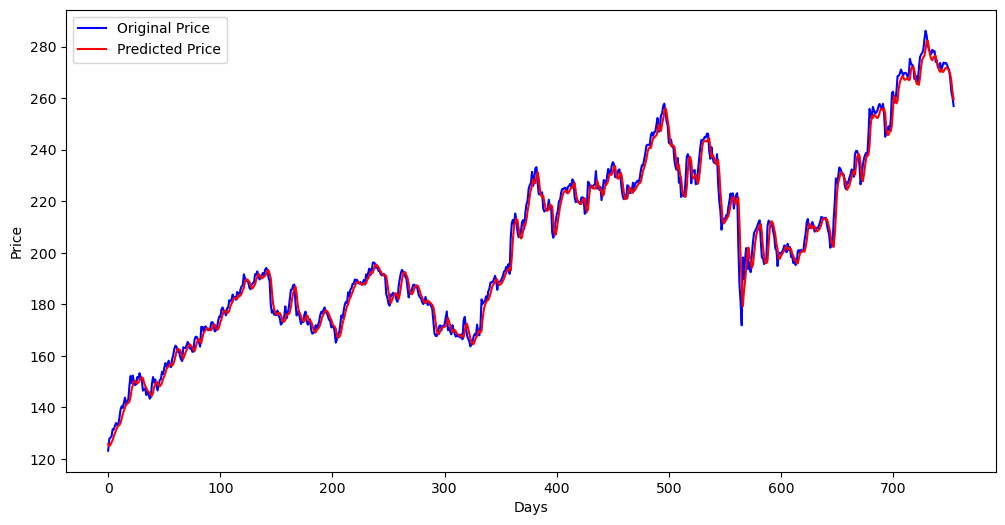

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')

(160.0, 330.0)

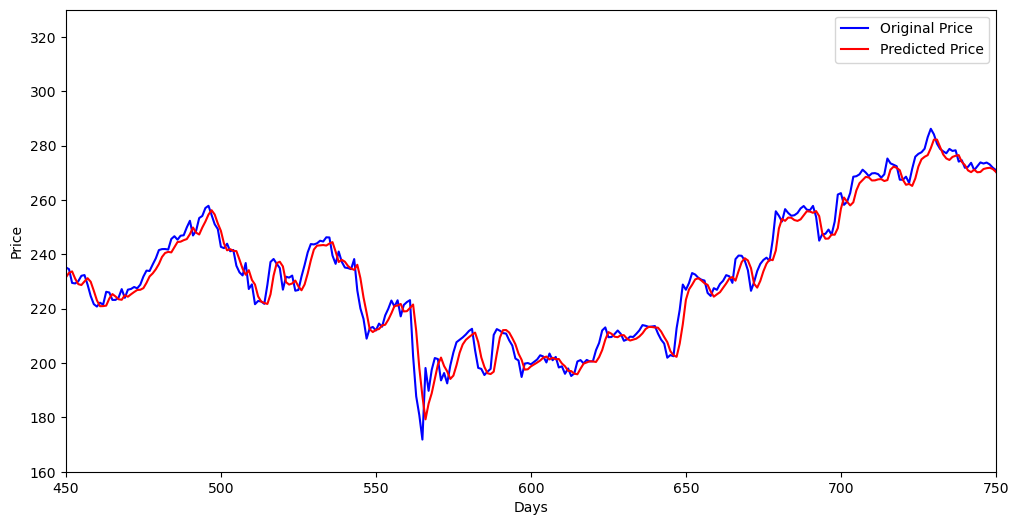

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.xlim(450, 750)
plt.ylim(160, 330)

# 10. Model Evalution

In [113]:
# Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
mse = mean_squared_error(y_test, y_predicted)
print(f"MSE : {mse}")

MSE : 15.416271597599383


In [112]:
# Root Mean Squared Error(RMSE)
rmse = np.sqrt(mse)
print("RMSE :", rmse )

RMSE : 3.9263560202303847


In [114]:
# R-Squared
r2 = r2_score(y_test,y_predicted)
print("R-Squared :", r2)

R-Squared : 0.9869910670173176
